In [2]:
import os
import cv2
import math
import logging
import numpy as np
import imageio
import torch
import json
import random
import sys
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

In [27]:
0.0003 * (0.95**20)

0.00010754577672256256

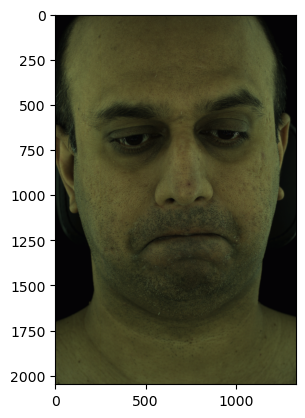

In [18]:
photopath = '/home/tungi/datasets/mf/m--20180227--0000--6795937--GHS/images'
# path = "{}/{}/{}/{}.png".format(photopath, 'E074_Blink', '400048', '062778')
path = "{}/{}/{}/{}.png".format(photopath, 'E061_Lips_Puffed', '400048', '023389')
photo = np.asarray(Image.open(path), dtype=np.float32)
# photo = photo / 255.0
plt.imshow(photo/255)

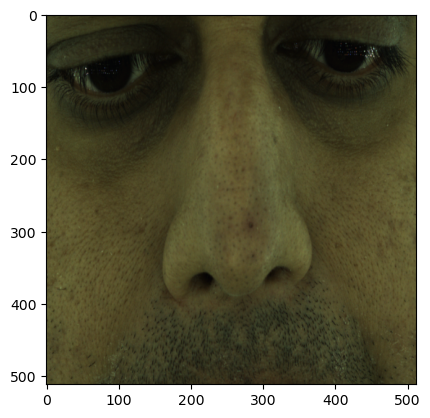

In [23]:
up_face = photo[600:600+600, 300:300+800]
up_face = cv2.resize(up_face, (512, 512))
plt.imshow(up_face/255)

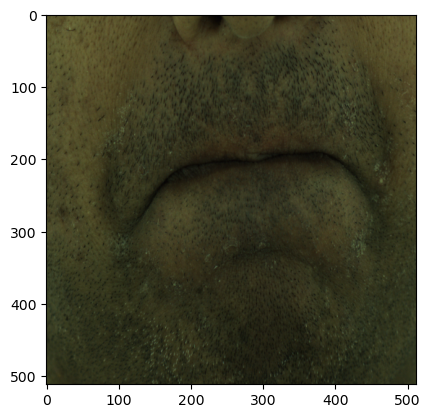

In [25]:
low_face = photo[1024:1024+512, 280:280+800]
low_face = cv2.resize(low_face, (512, 512))
plt.imshow(low_face/255)

In [44]:
checkpoint = torch.load('./saved/davae/checkpoints/model_32.pth')

In [2]:
[0.7268878 0.045365512 0.6852562 -740.1184
0.06507141 0.9887769 -0.13448398 156.47725
-0.68366647 0.14234535 0.7157779 376.51572]

In [11]:
from pytorch3d.renderer import (
    look_at_view_transform
)

In [ ]:
def render_path_circle(phi=15, dist=300, n_split=120):
    """
    Args:
        phi: elevation and azimuth in degree
        dist: distance between the object and the center of the circle
        
    Returns:
        R_traj: Tensor of shape [n_split, 3, 3] giving the rotation matrices along the rendering trajectory
    """
    def norm_vec(x):
        return x / np.linalg.norm(x)
    
    theta = np.linspace(0, 2*np.pi, n_split)
    diameter = dist * np.tan(phi * np.pi / 180)
    x = diameter * np.cos(theta)
    y = diameter * np.sin(theta)
    z = np.ones(n_split) * dist

    R_traj = torch.zeros(n_split, 3, 3)
    for i in range(n_split):
        z_axis = norm_vec(np.array((-x[i], y[i], -z[i])))
        up = np.array([0, 1., 0])
        x_axis = norm_vec(np.cross(up, z_axis))
        y_axis = norm_vec(np.cross(z_axis, x_axis))
        _R = np.hstack((x_axis[:, None], y_axis[:, None], z_axis[:, None]))
        R_traj[i] = torch.FloatTensor(_R)
    return 

In [14]:
R_cam, T_cam = look_at_view_transform(300, 0, 50)
R_cam

tensor([[[-0.6428,  0.0000, -0.7660],
         [ 0.0000,  1.0000,  0.0000],
         [ 0.7660,  0.0000, -0.6428]]])

In [ ]:
[0.7268878 0.045365512 0.6852562 -740.1184
0.06507141 0.9887769 -0.13448398 156.47725
-0.68366647 0.14234535 0.7157779 376.51572]

In [16]:
R_cam[0][0]

tensor([-0.6428,  0.0000, -0.7660])

In [ ]:
0.9955 0.0162 0.0923 3.940710067749023438e+01
1.187120005488395691e-02 -9.987679719924926758e-01 4.819040000438690186e-02 1.951469993591308594e+01
9.303469955921173096e-02 -4.688160121440887451e-02 -9.945589900016784668e-01 9.818179931640625000e+02